<a href="https://colab.research.google.com/github/jmerceron/AI-Activity/blob/main/Julien_AE_MLP_Handwritten_Digits_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow.keras as keras
import pandas as pd
import time
import sys

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

import tensorflow as tf

In [2]:
from keras.datasets import mnist
import numpy as np
(mnist_x_train, mnist_y_train), (mnist_x_test, mnist_y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
mnist_x_train = mnist_x_train.astype('float32') / 255.
mnist_x_test = mnist_x_test.astype('float32') / 255.
mnist_x_train = mnist_x_train.reshape((len(mnist_x_train), np.prod(mnist_x_train.shape[1:])))
mnist_x_test = mnist_x_test.reshape((len(mnist_x_test), np.prod(mnist_x_test.shape[1:])))

In [4]:
from keras.datasets import fashion_mnist
import numpy as np
(fashion_x_train, fashion_y_train), (fashion_x_test, fashion_y_test) = fashion_mnist.load_data()
fashion_x_train = fashion_x_train.astype('float32') / 255.
fashion_x_test = fashion_x_test.astype('float32') / 255.
fashion_x_train = fashion_x_train.reshape((len(fashion_x_train), np.prod(fashion_x_train.shape[1:])))
fashion_x_test = fashion_x_test.reshape((len(fashion_x_test), np.prod(fashion_x_test.shape[1:])))

4422102/4422102 [==============================] - 0s 0us/step


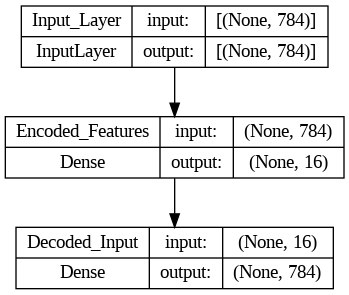

In [5]:
def create_autoencoders (feature_layer_dim = 16):
  input_img = Input(shape = (784,), name = 'Input_Layer')
  # The layer encoded has a dimension equal to feature_layer_dim and contains
  # the encoded input (therefore the name)
  encoded = Dense(feature_layer_dim, activation = 'relu', name = 'Encoded_Features')(input_img)
  decoded = Dense(784, activation = 'sigmoid', name = 'Decoded_Input')(encoded)

  autoencoder = Model(input_img, decoded)
  encoder = Model(input_img, encoded)

  encoded_input = Input(shape = (feature_layer_dim,))
  decoder = autoencoder.layers[-1]
  decoder = Model(encoded_input, decoder(encoded_input))

  return autoencoder, encoder, decoder

autoencoder, encoder, decoder = create_autoencoders (16)
keras.utils.plot_model(autoencoder, show_shapes=True)

MNIST

In [6]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
history = autoencoder.fit(mnist_x_train, mnist_x_train,
                epochs=30,
                batch_size=256,
                shuffle=True,
                validation_data=(mnist_x_test, mnist_x_test),
                verbose = 0)

In [7]:
encoded_imgs = encoder.predict(mnist_x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 2ms/step


In [8]:
np.save('temp_orig', mnist_x_test)
! ls -al temp_orig*
np.save('temp_encoded', encoded_imgs)
! ls -al temp_encoded*

-rw-r--r-- 1 root root 31360128 Jun 17 05:26 temp_orig.npy
-rw-r--r-- 1 root root 640128 Jun 17 05:26 temp_encoded.npy


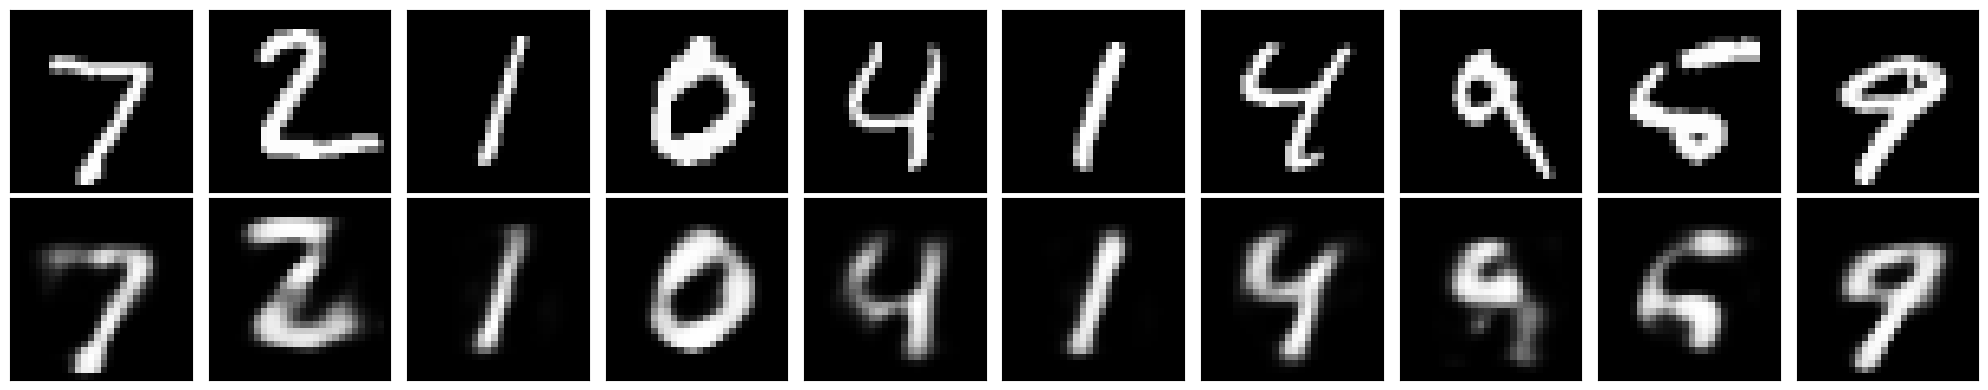

In [9]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
fig = plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(mnist_x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.tight_layout()
plt.show()

fig.savefig('comparison_16.png')

In [10]:
autoencoder, encoder, decoder = create_autoencoders (64)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(mnist_x_train, mnist_x_train,
                epochs=30,
                batch_size=256,
                shuffle=True,
                validation_data=(mnist_x_test, mnist_x_test),
                verbose = 0)
encoded_imgs = encoder.predict(mnist_x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 1s 2ms/step


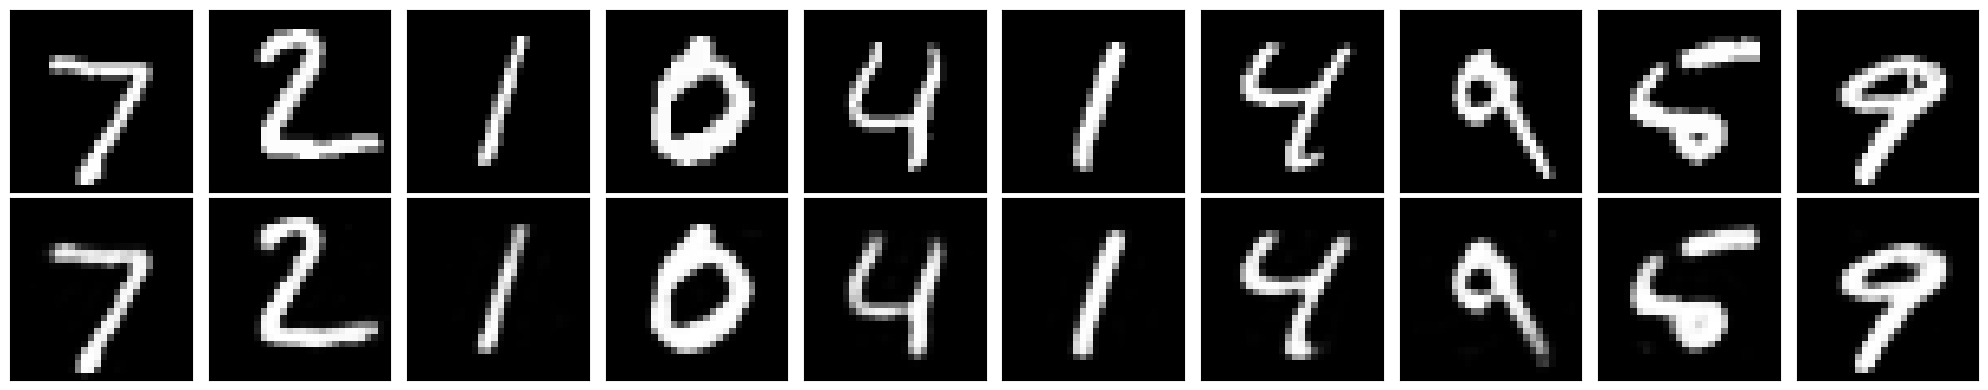

In [11]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
fig = plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(mnist_x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.tight_layout()
plt.show()

fig.savefig('comparison_32.png')

313/313 [==============================] - 0s 1ms/step


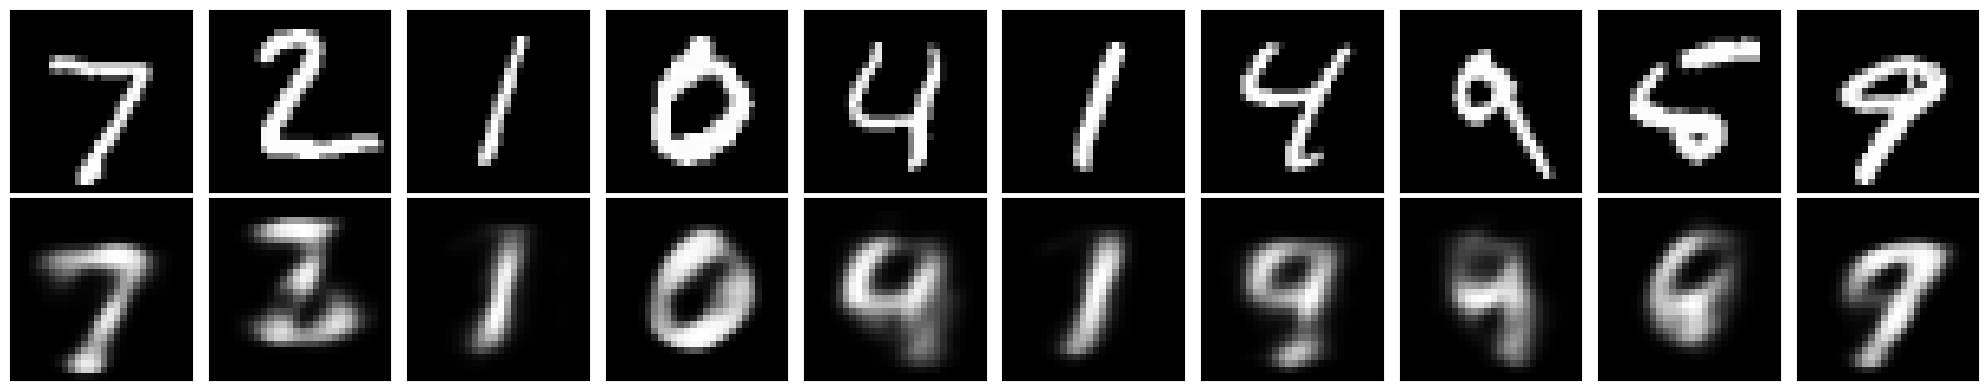

In [12]:
autoencoder, encoder, decoder = create_autoencoders (8)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(mnist_x_train, mnist_x_train,
                epochs=30,
                batch_size=256,
                shuffle=True,
                validation_data=(mnist_x_test, mnist_x_test),
                verbose = 0)
encoded_imgs = encoder.predict(mnist_x_test)
decoded_imgs = decoder.predict(encoded_imgs)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
fig = plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(mnist_x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.tight_layout()
plt.show()

fig.savefig('comparison_8.png')

In [13]:
encoded_train_imgs = encoder.predict(mnist_x_train)
#decoded_imgs = decoder.predict(encoded_imgs)
encoded_train_imgs.shape

def plot_confusion_matrix(data, labels, output_filename):
    """Plot confusion matrix using heatmap.

    Args:
        data (list of list): List of lists with confusion matrix data.
        labels (list): Labels which will be plotted across x and y axis.
        output_filename (str): Path to output file.

    """
    sns.set(color_codes=True)
    plt.figure(1, figsize=(9, 6))

    sns.set(font_scale=1.3)
    ax = sns.heatmap(data, annot=True, cmap="Blues", cbar_kws={'label': 'Scale'},fmt='d')

    ax.set_xticklabels(labels, fontsize = 16)
    ax.set_yticklabels(labels, fontsize = 16)

    ax.set_xlabel("Predicted Label", fontsize = 16)
    ax.set_xlabel("True Label", fontsize = 16)

    plt.savefig(output_filename, bbox_inches='tight', dpi=300)
    plt.show()
    plt.close()


1875/1875 [==============================] - 3s 2ms/step


In [14]:
# importing necessary libraries
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns

start = time.time()

# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(encoded_train_imgs, mnist_y_train)

# accuracy on X_test
accuracy = knn.score(encoded_imgs, mnist_y_test)
print (accuracy )

end = time.time()
print("Running time",end - start,"sec.")

0.8927
Running time 2.2303709983825684 sec.


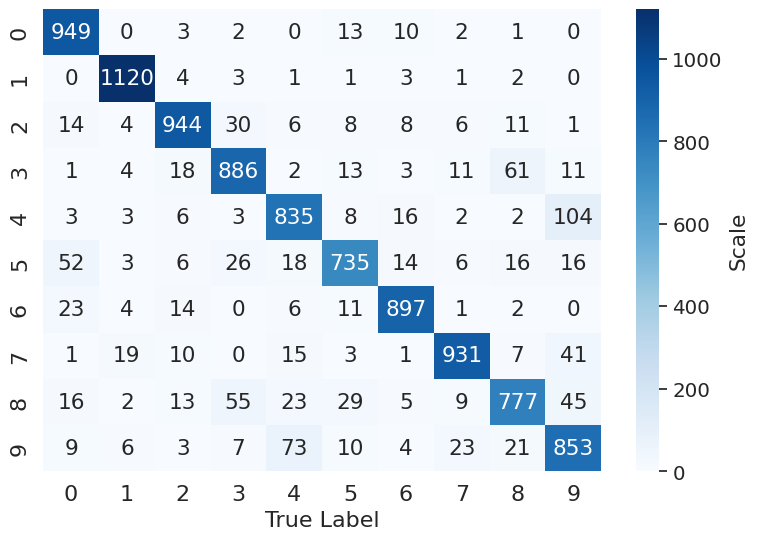

In [15]:
# creating a confusion matrix
knn_predictions = knn.predict(encoded_imgs)
cm = confusion_matrix(mnist_y_test, knn_predictions)
cm
plot_confusion_matrix(cm, [0,1,2,3,4,5,6,7,8,9], "confusion_matrix.png")

In [16]:
start = time.time()

from sklearn.neighbors import KNeighborsClassifier
knn2 = KNeighborsClassifier(n_neighbors = 7).fit(mnist_x_train, mnist_y_train)
# accuracy on X_test
accuracy = knn2.score(mnist_x_test, mnist_y_test)
print (accuracy )

end = time.time()
print("Running time",end - start,"sec.")

0.9694
Running time 38.83804702758789 sec.


FASHION MNIST

Epoch 1/30
235/235 [==============================] - 4s 14ms/step - loss: 0.4658 - val_loss: 0.3807
Epoch 2/30
235/235 [==============================] - 2s 11ms/step - loss: 0.3634 - val_loss: 0.3507
Epoch 3/30
235/235 [==============================] - 2s 10ms/step - loss: 0.3407 - val_loss: 0.3369
Epoch 4/30
235/235 [==============================] - 2s 10ms/step - loss: 0.3318 - val_loss: 0.3310
Epoch 5/30
235/235 [==============================] - 3s 11ms/step - loss: 0.3270 - val_loss: 0.3271
Epoch 6/30
235/235 [==============================] - 3s 14ms/step - loss: 0.3236 - val_loss: 0.3241
Epoch 7/30
235/235 [==============================] - 2s 9ms/step - loss: 0.3210 - val_loss: 0.3218
Epoch 8/30
235/235 [==============================] - 2s 9ms/step - loss: 0.3189 - val_loss: 0.3200
Epoch 9/30
235/235 [==============================] - 2s 10ms/step - loss: 0.3174 - val_loss: 0.3187
Epoch 10/30
235/235 [==============================] - 2s 9ms/step - loss: 0.3164 - val_loss:

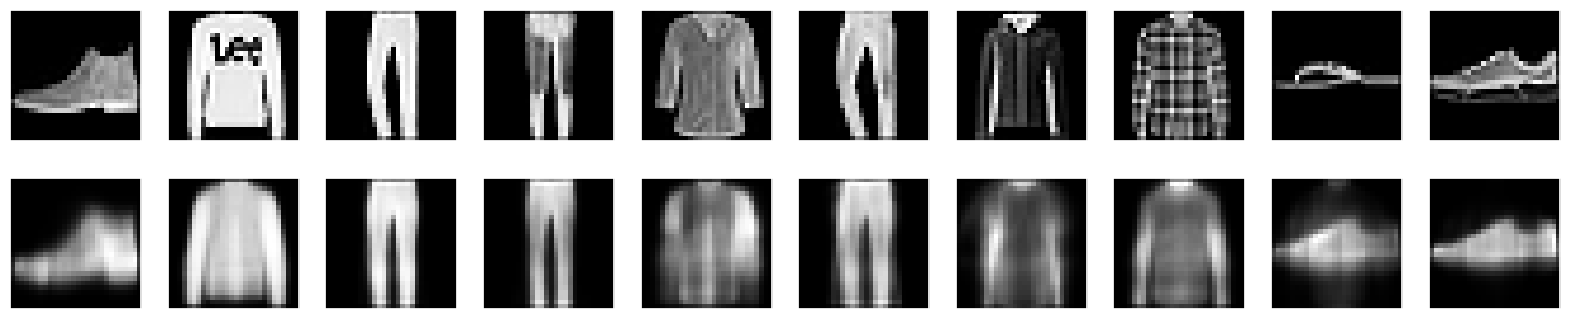

In [17]:
autoencoder, encoder, decoder = create_autoencoders (8)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(fashion_x_train, fashion_x_train,
                epochs=30,
                batch_size=256,
                shuffle=True,
                validation_data=(fashion_x_test, fashion_x_test),
                verbose = 1)
encoded_imgs = encoder.predict(fashion_x_test)
decoded_imgs = decoder.predict(encoded_imgs)

import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(fashion_x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [19]:
encoded_fashion_train_imgs = encoder.predict(fashion_x_train)
encoded_fashion_test_imgs = encoder.predict(fashion_x_test)
start = time.time()

# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(encoded_fashion_train_imgs, fashion_y_train)

# accuracy on X_test
accuracy = knn.score(encoded_fashion_test_imgs, fashion_y_test)
print (accuracy )

end = time.time()
print(end - start)

313/313 [==============================] - 0s 1ms/step
0.8015
1.522947072982788


In [20]:
autoencoder, encoder, decoder = create_autoencoders (16)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(fashion_x_train, fashion_x_train,
                epochs=30,
                batch_size=256,
                shuffle=True,
                validation_data=(fashion_x_test, fashion_x_test),
                verbose = 0)

encoded_fashion_train_imgs = encoder.predict(fashion_x_train)
encoded_fashion_test_imgs = encoder.predict(fashion_x_test)

start = time.time()

# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(encoded_fashion_train_imgs, fashion_y_train)

# accuracy on X_test
accuracy = knn.score(encoded_fashion_test_imgs, fashion_y_test)
print (accuracy )

end = time.time()
print(end - start)

313/313 [==============================] - 1s 1ms/step
0.8324
3.350433588027954
